In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from classify_grid import *
import os, ebf
from astropy.io import ascii
import time
#import mwdust

In [4]:
# load MIST models
homedir=os.path.expanduser('~/')
model=ebf.read(homedir+'science/models/MIST/mesa.ebf')

In [5]:
# prelims to manipulate some model variables (to be automated soon ...)
model['rho']=np.log10(model['rho'])
# next line turns off Dnu scaling relation corrections
model['fdnu'][:]=1.
model['avs']=np.zeros(len(model['teff']))
model['dis']=np.zeros(len(model['teff']))

In [5]:
# next 2 lines allow to use a reddening model (needs galactic coordinates)
#x.addcoords(338.3683920,-9.0227690)
#dustmodel = mwdust.Combined15()

In [6]:
# initilize class with observables
x=obsdata()

In [11]:
# add any combiantion of observables
# Teff, logg, FeH + uncertainties
x.addspec([5801.,-99.0,-0.07],[80.,0.0,0.1])
# numax & Dnu + uncertainties
x.addseismo([1240.,63.5],[70.,1.5])
# 2MASS photometry 
x.addjhk([10.369,10.07,10.025],[0.022,0.018,0.019])
# Sloan photometry
x.addgriz([11.776,11.354,11.238,11.178],[0.02,0.02,0.02,0.02])

In [12]:
# run classification
paras=classify(input=x,model=model,dustmodel=0.,doplot=0)

teff 182165
dnu 7483
numax 7279
feh 4602
number of models used within non-phot obsconstraints: 4602
number of models incl reddening: 598260
number of models after phot constraints: 598260
----
teff 5847.91388296 75.4675416274 75.4675416274
logg 4.01789973159 0.012 0.0135
feh -0.05 0.1 0.1
rad 1.67234242702 0.0415016962858 0.0373515266572
mass 1.0636632814 0.0562220380412 0.0511109436738
rho 0.22555418561 0.0095448733239 0.00915735749469
lum 2.9515382176 0.247713494219 0.228533391887
age 7.5 1.0 1.0
avs 0.0725 0.08 0.08
dis 371.949892658 9.90515739598 9.90515739598


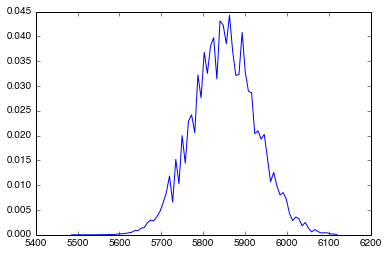

In [13]:
# plot teff posterior
plt.plot(paras.teffpx,paras.teffpy)

7.5 1.0 1.0


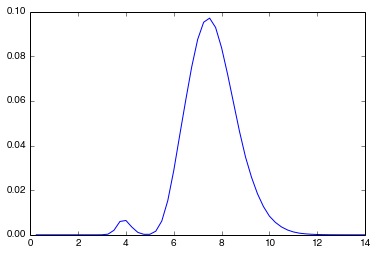

In [14]:
# print age median +/- 1 sigma, plot posterior
print paras.age,paras.ageep,paras.ageem
plt.plot(paras.agepx,paras.agepy)

1.0636632814 0.0562220380412 0.0511109436738


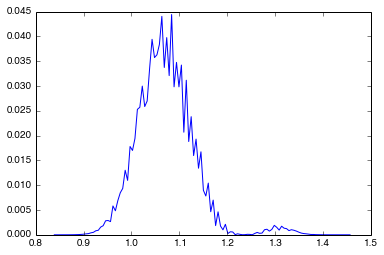

In [15]:
# print mass median +/- 1 sigma, plot posterior
print paras.mass,paras.massep,paras.massem
plt.plot(paras.masspx,paras.masspy)

In [16]:
# delete numax & Dnu constraint
x.addseismo([-99.,-99.],[70.,1.5])
# add parallax with a 3% uncertainty
x.addplx(1./372.,1./372.*0.03)

In [17]:
# re-run classification
paras=classify(input=x,model=model,dustmodel=0.,doplot=0)

teff 182165
feh 58680
number of models used within non-phot obsconstraints: 58680
number of models incl reddening: 7628400
number of models after phot constraints: 1100754
----
teff 5848.99794064 75.8674310669 75.8674310669
logg 4.01457260117 0.03 0.03
feh -0.05 0.1 0.1
rad 1.67489117621 0.0506814245653 0.0506814245653
mass 1.05815894365 0.0513964837403 0.0420516685148
rho 0.225334118051 0.0240259763259 0.0217110608625
lum 2.94823896376 0.232753802539 0.215723165698
age 7.5 1.0 1.0
avs 0.0725 0.08 0.08


7.5 1.0 1.0


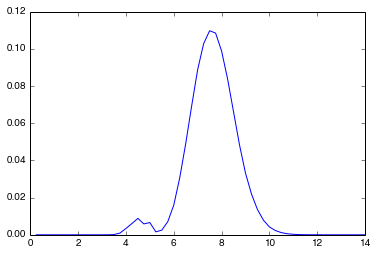

In [18]:
# print age median +/- 1 sigma, plot posterior
print paras.age,paras.ageep,paras.ageem
plt.plot(paras.agepx,paras.agepy)